In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
import matplotlib as mpl
plt.use.style('latexstyle.mplstyle')

AttributeError: module 'matplotlib.pyplot' has no attribute 'use'

In [8]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [27]:
import os
os.listdir('/home/ak/.config/matplotlib')
plt.style.use('/home/ak/.config/matplotlib/latexstyle.mplstyle')
folder = '/home/ak/Documents/Research/PaperCode/Thesis Plots'

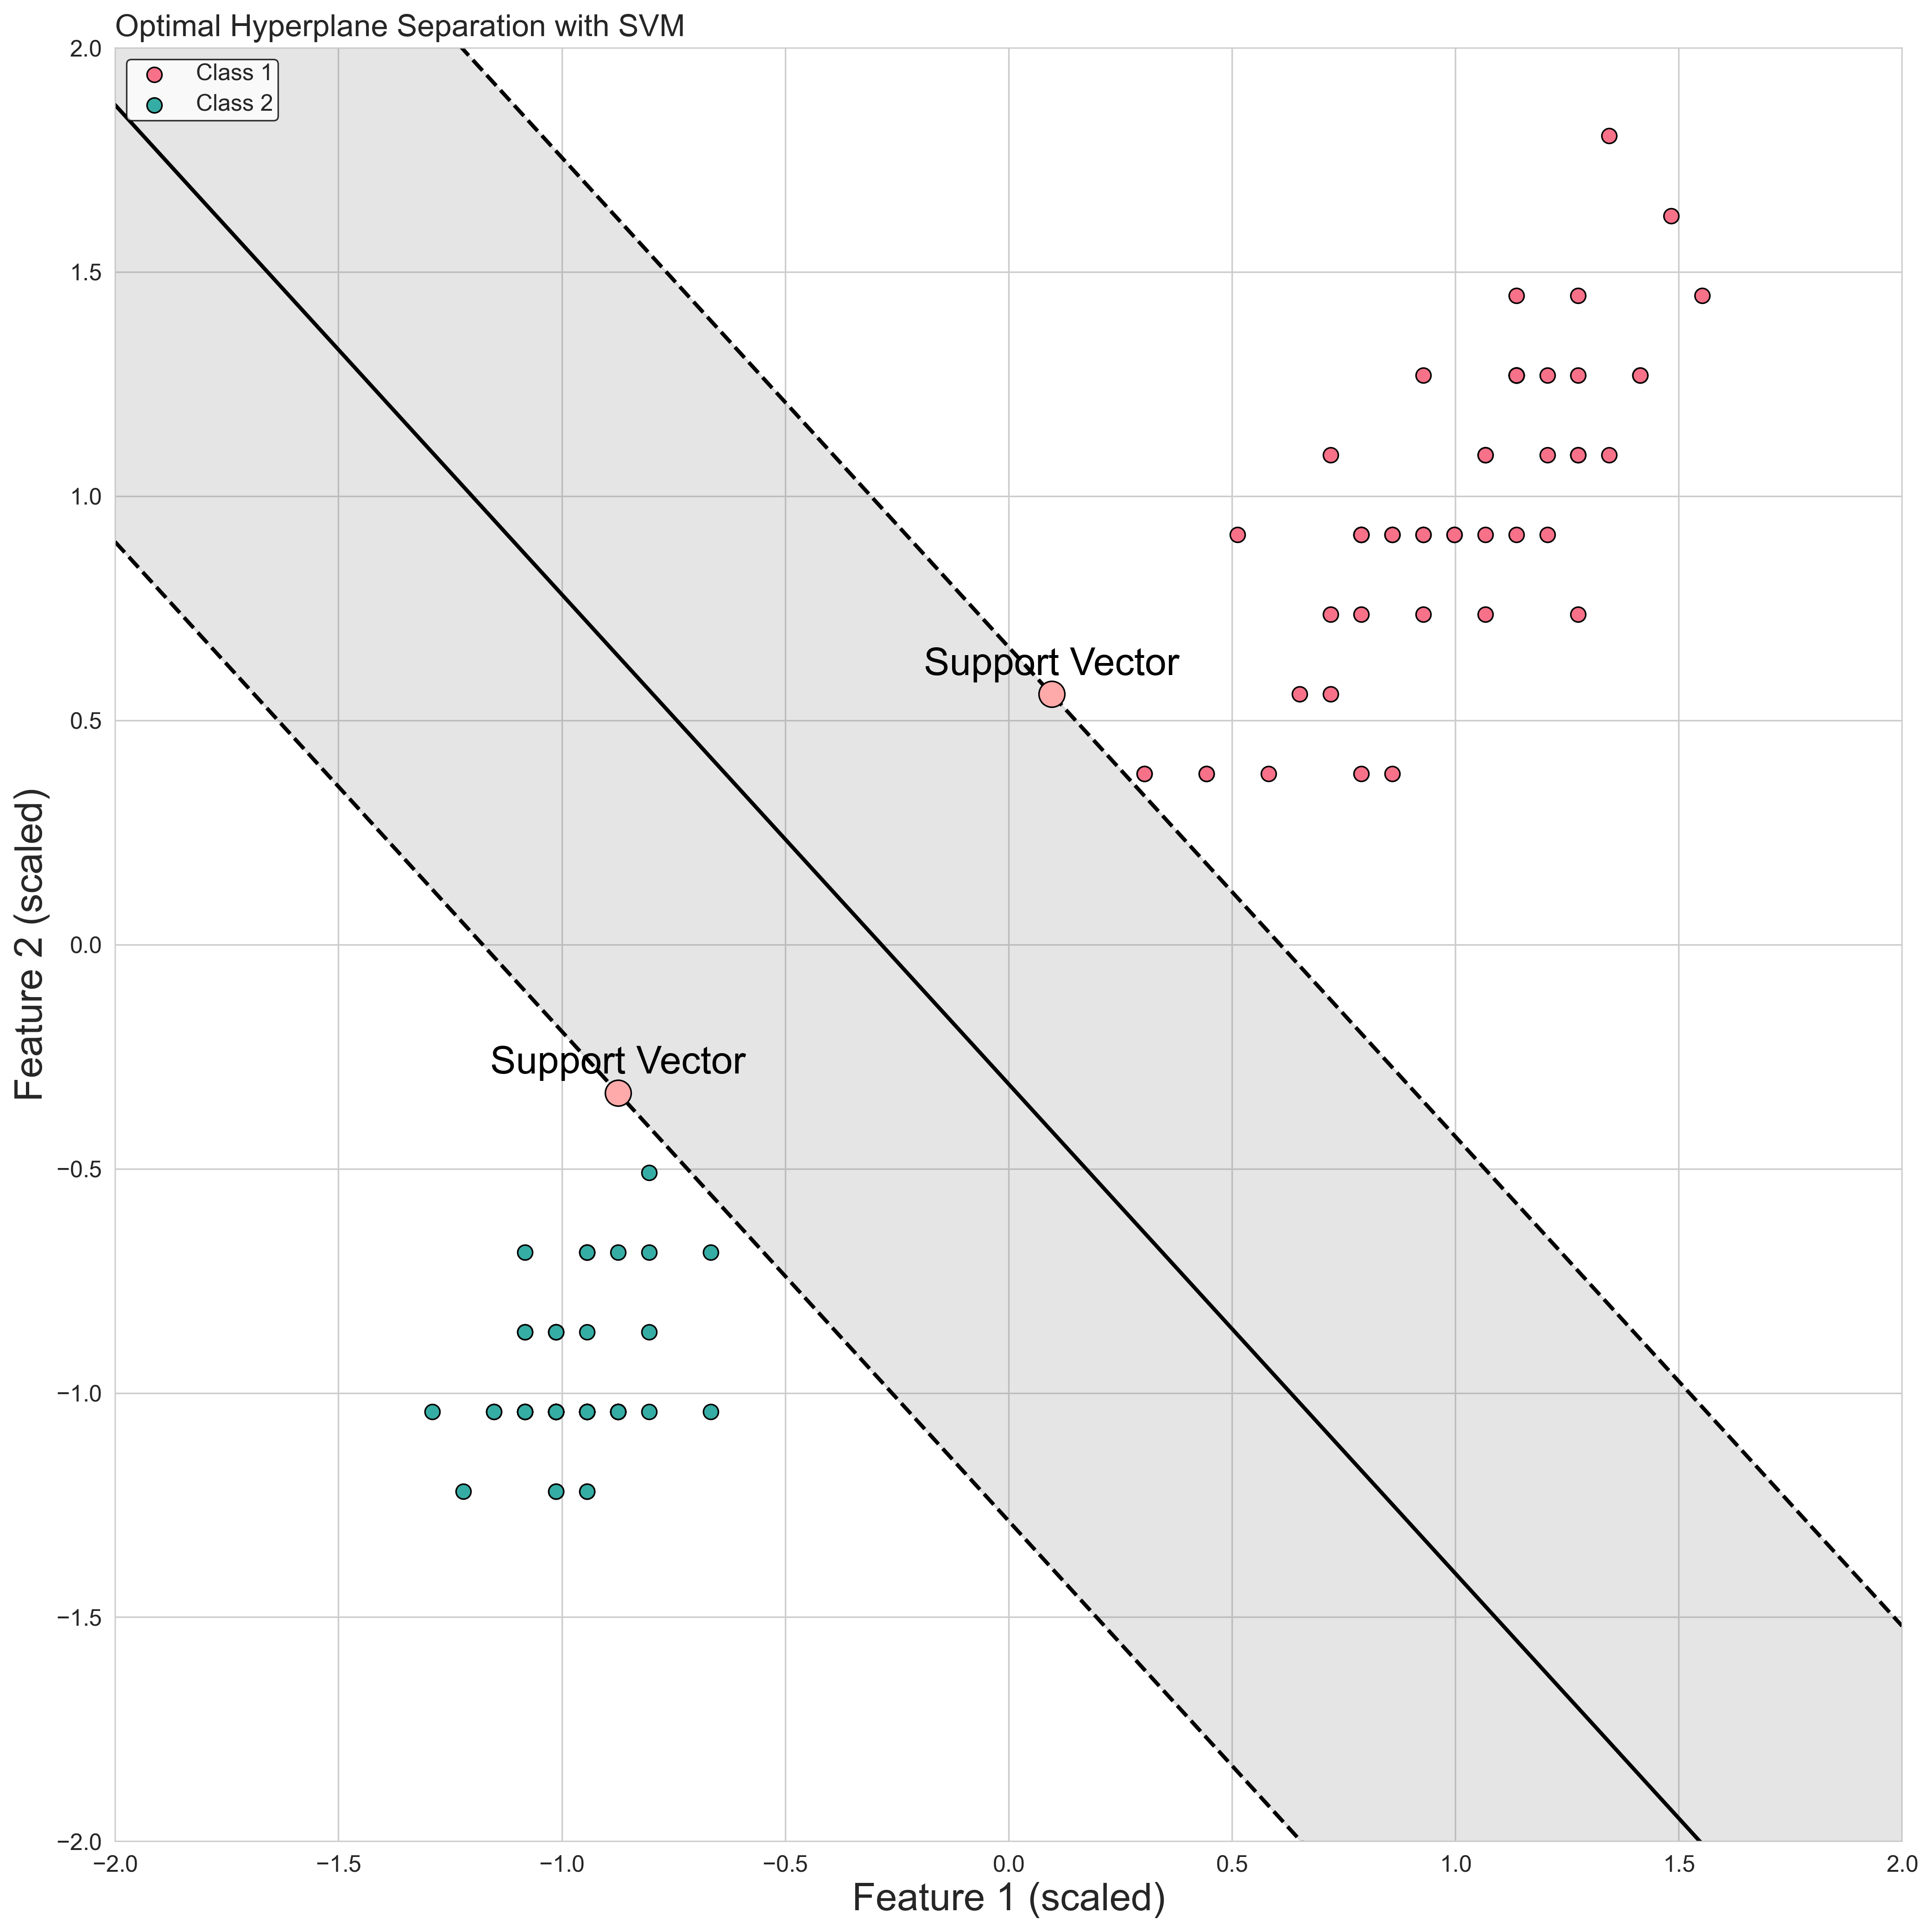

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Setting a style for seaborn
sns.set_style("whitegrid")

# Load the iris data
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]

# Filter data for only two classes
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the SVM classifier
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_scaled, y)

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', edgecolors="k", zorder=10)
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

    # Annotating support vectors
    for sv in svs:
        plt.annotate("Support Vector", (sv[0], sv[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=20, color="black")

# Plot size
plt.figure(figsize=(14, 14))

# Colors
palette = sns.color_palette("husl", 2)  # 2 classes

plt.scatter(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], color=palette[0], label="Class 1", s=60, edgecolors="k")
plt.scatter(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], color=palette[1], label="Class 2", s=60, edgecolors="k")

plot_svc_decision_boundary(svm_clf, -2, 2)

# Fill the margin
plt.fill_between(np.linspace(-2, 2, 200), 
                 -svm_clf.coef_[0][0]/svm_clf.coef_[0][1] * np.linspace(-2, 2, 200) - svm_clf.intercept_[0]/svm_clf.coef_[0][1] + 1/svm_clf.coef_[0][1],
                 -svm_clf.coef_[0][0]/svm_clf.coef_[0][1] * np.linspace(-2, 2, 200) - svm_clf.intercept_[0]/svm_clf.coef_[0][1] - 1/svm_clf.coef_[0][1],
                 color="grey", alpha=0.2)

plt.xlabel("Petal length (scaled)", fontsize=14)
plt.ylabel("Petal width (scaled)", fontsize=14)
plt.legend(loc="upper left", fontsize=12, edgecolor="k")
plt.title("Optimal Hyperplane Separation with SVM", fontsize=16)
plt.axis([-2, 2, -2, 2])


# ...

plt.xlabel("Feature 1 (scaled)", fontsize=20)  # Increase fontsize for x label
plt.ylabel("Feature 2 (scaled)", fontsize=20)  # Increase fontsize for y label

title = 'hyperplane.png'
filePath = os.path.join(folder, title)
plt.savefig(filePath, dpi = 300)
# ..
plt.tight_layout()
plt.show()



No handles with labels found to put in legend.


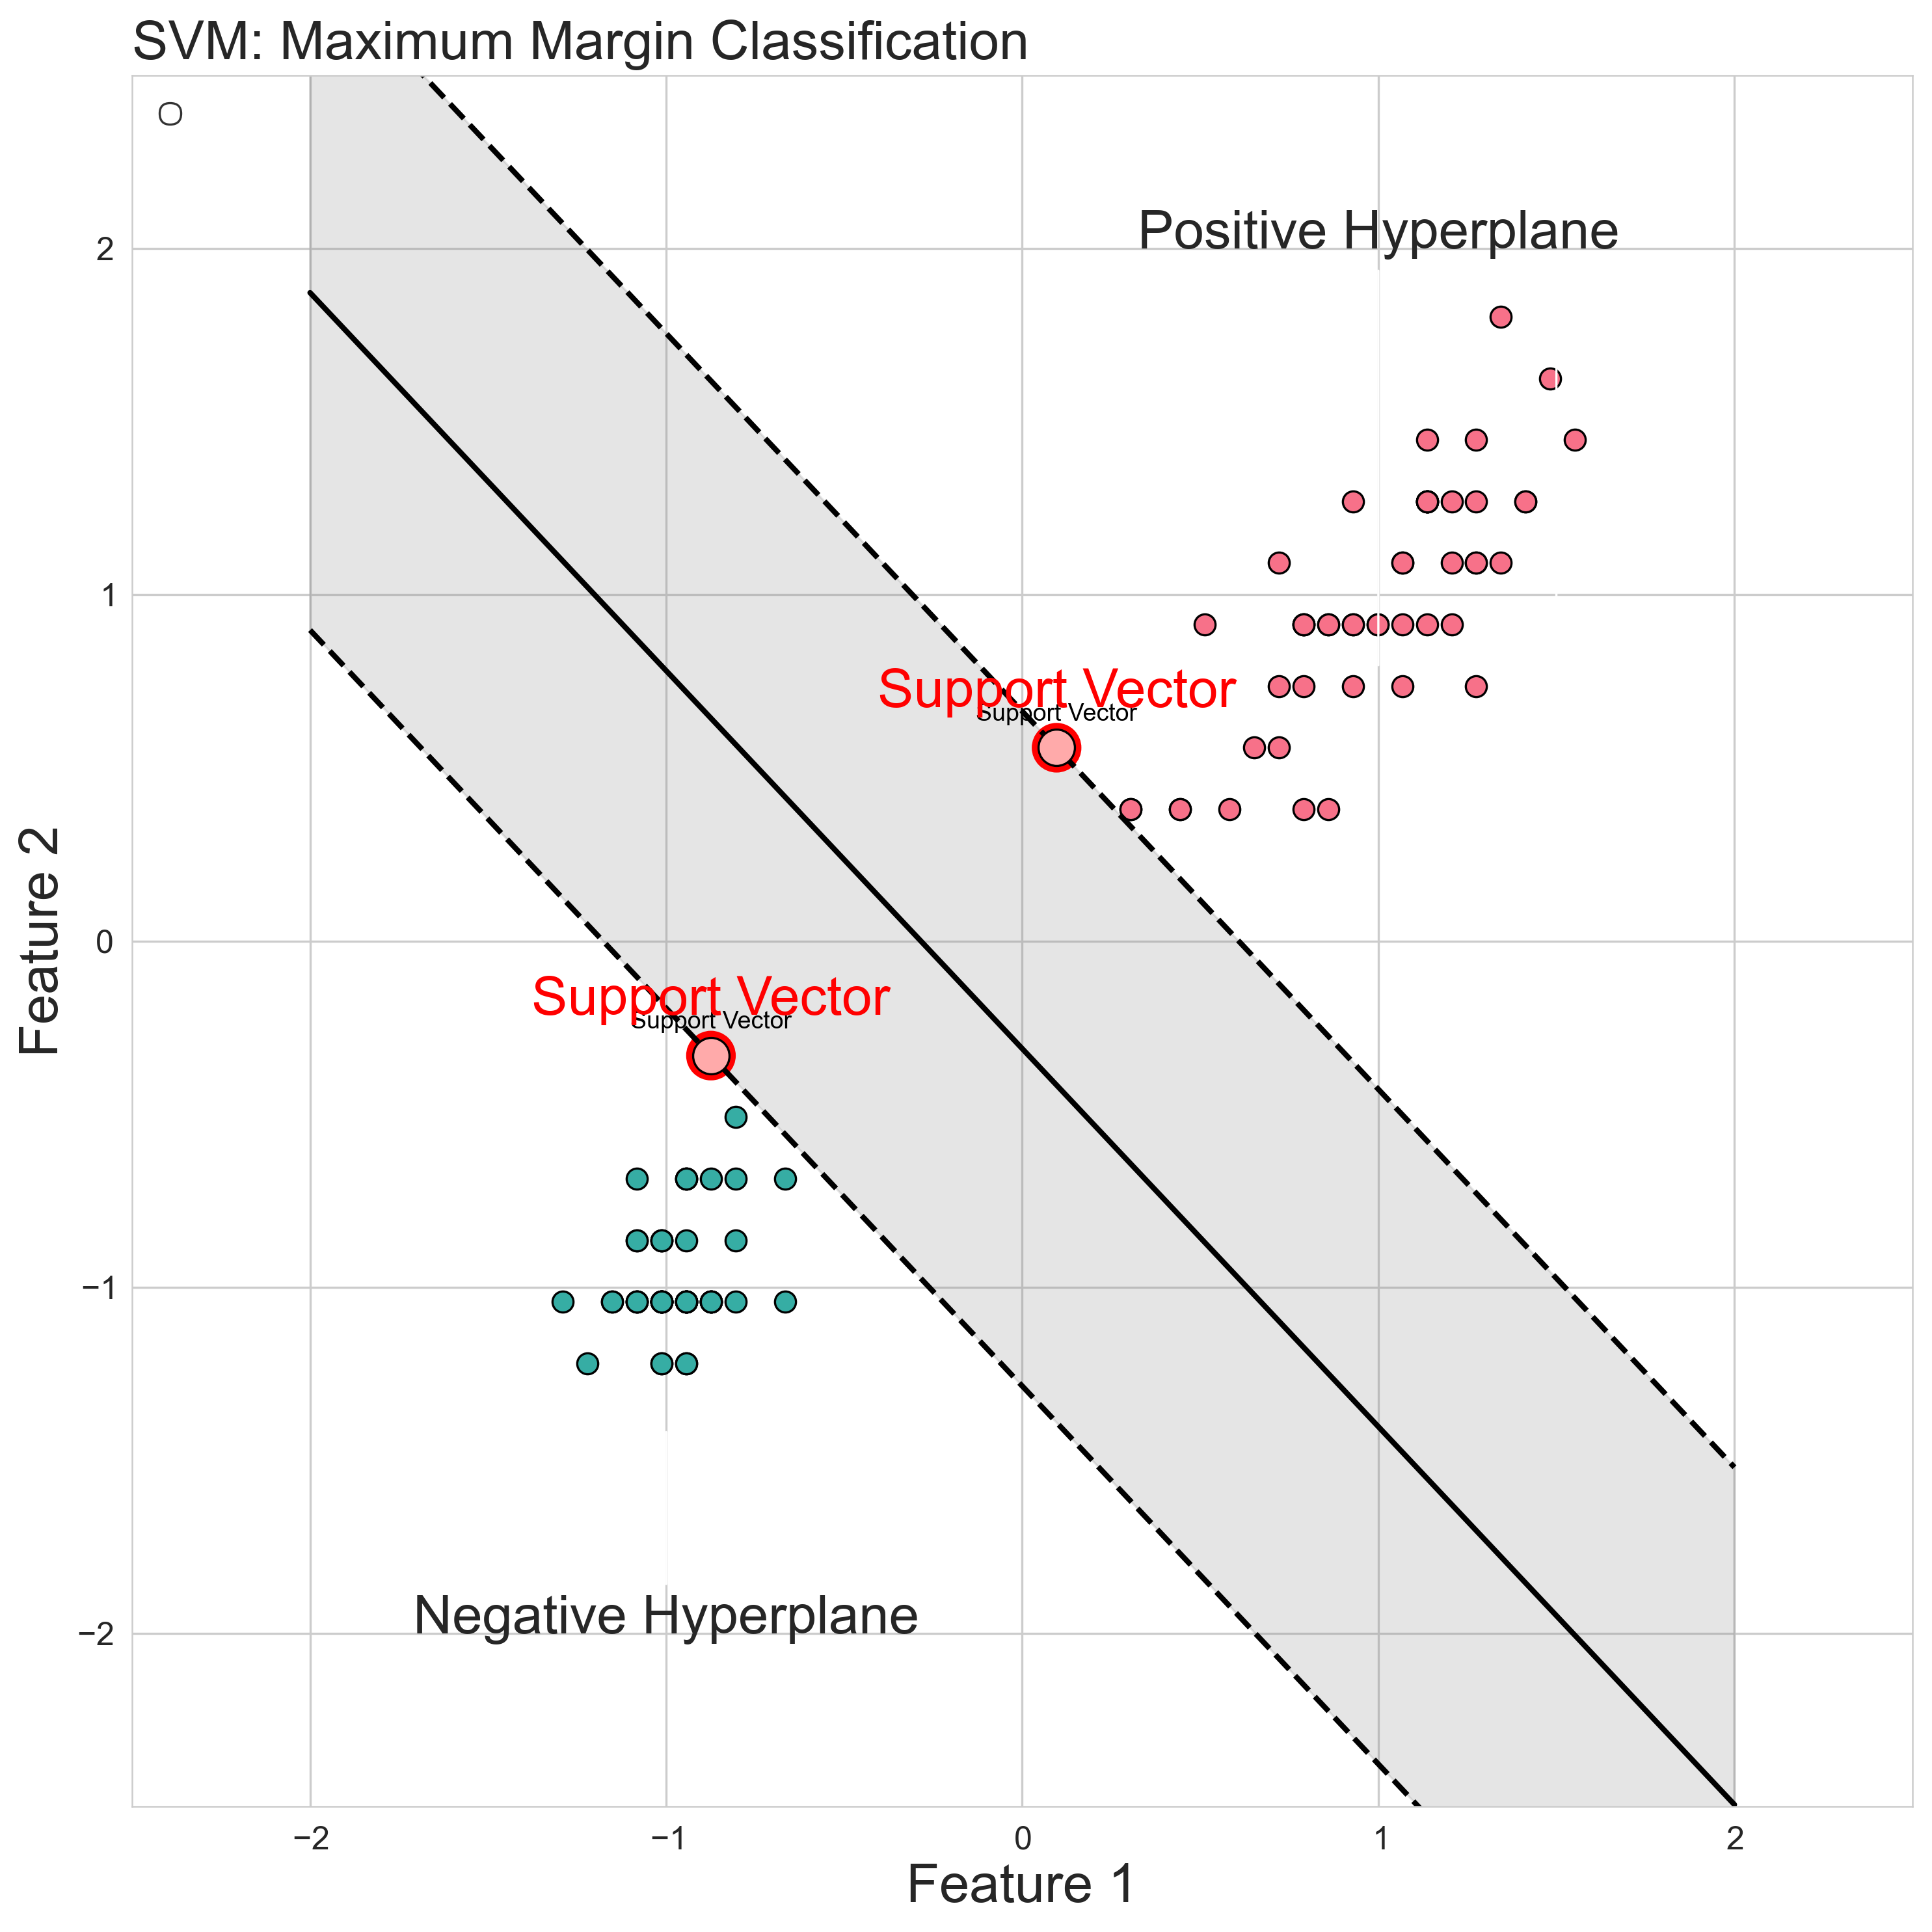

In [16]:
# ...

# Plot size
plt.figure(figsize=(10, 10))

# Colors
palette = sns.color_palette("husl", 2)

plt.scatter(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], color=palette[0], label="", s=60, edgecolors="k")
plt.scatter(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], color=palette[1], label="", s=60, edgecolors="k")

plot_svc_decision_boundary(svm_clf, -2, 2)

# Fill the margin
plt.fill_between(np.linspace(-2, 2, 200), 
                 -svm_clf.coef_[0][0]/svm_clf.coef_[0][1] * np.linspace(-2, 2, 200) - svm_clf.intercept_[0]/svm_clf.coef_[0][1] + 1/svm_clf.coef_[0][1],
                 -svm_clf.coef_[0][0]/svm_clf.coef_[0][1] * np.linspace(-2, 2, 200) - svm_clf.intercept_[0]/svm_clf.coef_[0][1] - 1/svm_clf.coef_[0][1],
                 color="grey", alpha=0.2)

# Annotate hyperplanes
# plt.annotate('Maximum Margin Hyperplane', xy=(0, -svm_clf.intercept_[0]/svm_clf.coef_[0][1]), xytext=(0, -2), fontsize=20,
#              arrowprops=dict(facecolor='black', arrowstyle='-'),
#              ha='center')

plt.annotate('Positive Hyperplane', xy=(1, 1*svm_clf.coef_[0][0]/svm_clf.coef_[0][1] - svm_clf.intercept_[0]/svm_clf.coef_[0][1]), xytext=(1, 2), fontsize=20,
             arrowprops=dict(facecolor='black', arrowstyle='-'),
             ha='center')

plt.annotate('Negative Hyperplane', xy=(-1, -1*svm_clf.coef_[0][0]/svm_clf.coef_[0][1] - svm_clf.intercept_[0]/svm_clf.coef_[0][1]), xytext=(-1, -2), fontsize=20,
             arrowprops=dict(facecolor='black', arrowstyle='-'),
             ha='center')

# Annotate the margin with a bracket
plt.annotate('', xy=(1.5, 1.5*svm_clf.coef_[0][0]/svm_clf.coef_[0][1] - svm_clf.intercept_[0]/svm_clf.coef_[0][1] + 0.5), 
             xytext=(1.5, 1.5*svm_clf.coef_[0][0]/svm_clf.coef_[0][1] - svm_clf.intercept_[0]/svm_clf.coef_[0][1] - 0.5),
             fontsize=20,
             arrowprops=dict(arrowstyle='|-|, widthA=0.5, widthB=0.5', facecolor='black'))

# plt.text(1.7, -svm_clf.intercept_[0]/svm_clf.coef_[0][1], 'Maximum Margin', va='center', ha='left', fontsize=20)

# Annotate support vectors
for sv in svm_clf.support_vectors_:
    plt.scatter(sv[0], sv[1], s=250, facecolors='none', edgecolors='red', linewidth=2.5)
    plt.annotate('Support Vector', (sv[0], sv[1]), textcoords="offset points", xytext=(0,15), ha='center', fontsize=20, color="red")

plt.xlabel("Feature 1", fontsize=20)
plt.ylabel("Feature 2", fontsize=20)
plt.legend(loc="upper left", fontsize=20, edgecolor="k")
plt.title("SVM: Maximum Margin Classification", fontsize=20)
plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.tight_layout()
plt.show()


In [24]:
os.listdir('ak/home/Documents/Research/Thesis Plots')

FileNotFoundError: [Errno 2] No such file or directory: 'ak/home/Documents/Research/Thesis Plots'

In [26]:
os.listdir('/home/ak/Documents/Research/PaperCode/Thesis Plots')

['.ipynb_checkpoints', 'Untitled.ipynb']